## Part 1: Basic Option Valuation

In [0]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import gmean
from scipy.stats import norm
from tqdm import tqdm as _tqdm

import seaborn as sns
sns.set(color_codes=True)

def tqdm(*args, **kwargs):
    return _tqdm(*args, **kwargs, mininterval=1)

In [0]:
def montecarlo_simulation_put(S, v, r, T, K, sim, seed=None):
    """
    Run Monte Carlo simulation to estimate put options price.
    
    S: price at time t
    v: volatility
    r: risk-free-rate
    T: annualised expiry time (in years)
    K: strike price
    sim: amount of simulations per estimated option price
    seed: default = None
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Compute stock prices at time T using geometric Brownian motion
    prices = S * np.exp((r - 0.5 * v**2) * T + v * np.sqrt(T) * np.random.normal(size=sim))
    
    # Determine payoffs
    payoffs = K - prices
    payoffs[payoffs < 0] = 0
    
    # Compute MC estimate and standard error
    price = math.exp(-r * T) * payoffs.mean()
    std_error = payoffs.std() / math.sqrt(sim)
    
    return price, std_error

#### Subsection 1: Compute the price using the Monte Carlo method

In [3]:
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
sim = 1000000
price, std_error = montecarlo_simulation_put(S, v, r, T, K, sim)

print('Simulated price: ', price)
print('Standard error:', std_error)

Simulated price:  4.781851338643347
Standard error: 0.008469537563548964


In [4]:
lower_limit = price - 1.96 * std_error
upper_limit = price + 1.96 * std_error

print("95%% Interval: [%.4f, %.4f]" %(lower_limit, upper_limit))

95% Interval: [4.7653, 4.7985]


In [5]:
sim = 100000

mc_estimates = []

for i in tqdm(range(10000)):
    price, _ = montecarlo_simulation_put(S, v, r, T, K, sim)
    mc_estimates.append(price)

100%|██████████| 10000/10000 [01:30<00:00, 111.11it/s]


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


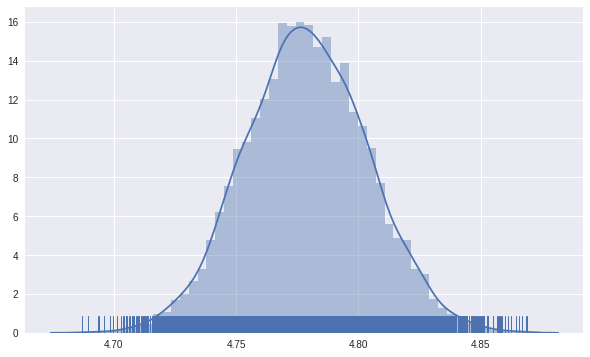

Mean:  4.778838649882996
Stdev:  0.02518796929228008


In [6]:
mc_estimates = np.array(mc_estimates)

plt.figure(figsize=(10, 6))
sns.distplot(np.array(mc_estimates), hist=True, rug=True)
plt.savefig('mc_histogram.png', dpi=200)
plt.show()

print("Mean: ", mc_estimates.mean())
print("Stdev: ", mc_estimates.std())

#### Subsection 2: Carry out convergence studies

In [46]:
# carry out simulation for increasing number of simulations and save results
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
sim_max = 5000000
sim_steps = np.arange(0, sim_max+1, 1000)[1:]
# sim_stes = range(10, sim_max)

# run monte carlo simulation for different amount of simulations
prices = []
std_errors = []
for i in tqdm(sim_steps):
    price, std_error = montecarlo_simulation_put(S, v, r, T, K, i)
    prices.append(price)
    std_errors.append(std_error)

100%|██████████| 5000/5000 [26:27<00:00,  1.78it/s]


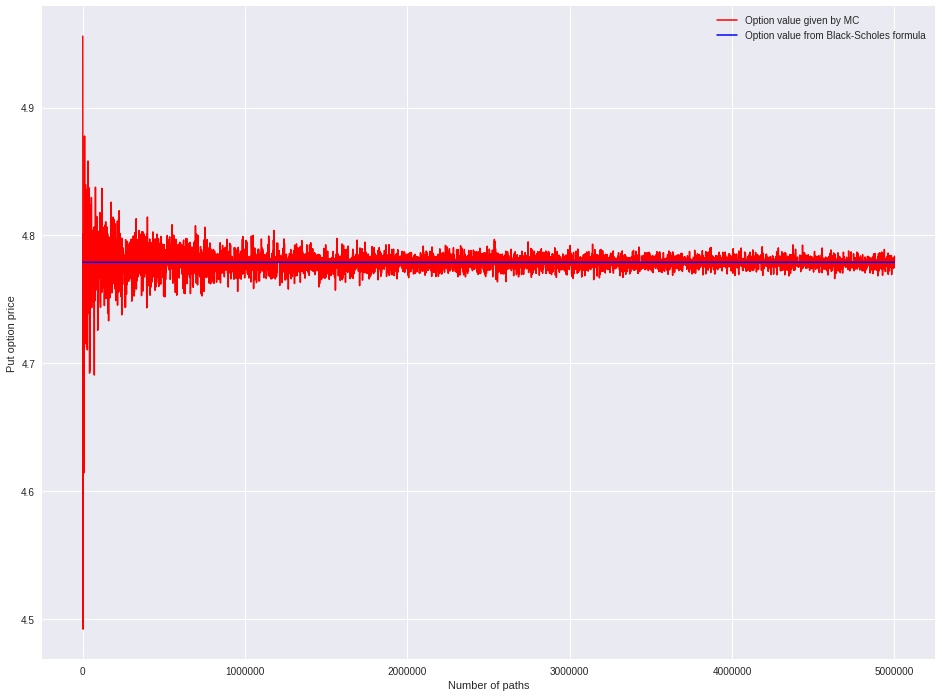

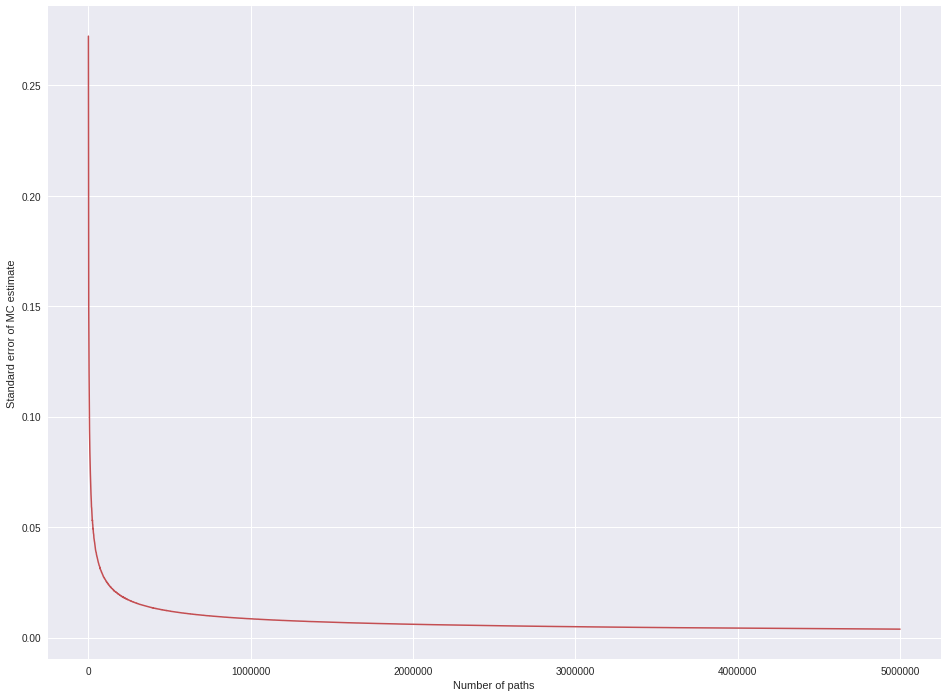

In [50]:
value_bs = 4.77897

# plot results
simulations = sim_steps
plt.figure(figsize=(16,12))
plt.plot(simulations, prices, linewidth=1.5, color='red', label='Option value given by MC')
plt.plot(simulations, [value_bs for i in simulations], color='blue', linewidth=1.5, alpha=1,
         label='Option value from Black-Scholes formula')
plt.title('Number of simulations against put option price')
plt.xlabel('Number of paths')
plt.ylabel('Put option price')
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
plt.plot(sim_steps, std_errors, linewidth=1.5, color='r')
plt.title('Number of simulations against standard error of MC estimate')
plt.xlabel('Number of paths')
plt.ylabel('Standard error of MC estimate')
plt.show()

#### Subsection 3: Perform numerical tests for varying values for the strike and the volatility parameter
- Perform numerical tests for varying values for the strike and the volatility parameter. What is the standard error of your estimate and what does this tell you about the accuracy?

In [7]:
# Perform numerical test for varying values for the strike and the volatility parameter
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
sim = 1000000

# Set strike low and high
strike_low = 60
strike_high = 140
strikes = np.arange(strike_low, strike_high)

# simulate for each strike price (1000 times)
prices = []
std_errors = []
for strike in tqdm(strikes):
    price, std_error = montecarlo_simulation_put(S, v, r, T, strike, sim)
    prices.append(price)
    std_errors.append(std_error)

100%|██████████| 80/80 [00:07<00:00, 10.96it/s]


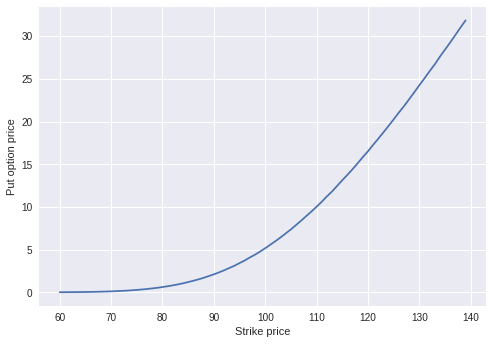

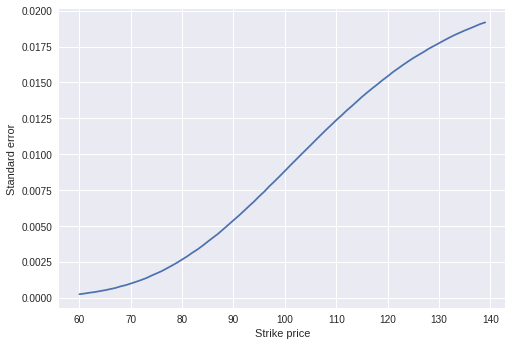

In [9]:
# plot results
plt.figure()
plt.plot(strikes, prices)
plt.title('Average price against strike price')
plt.xlabel('Strike price')
plt.ylabel('Put option price')
plt.show()


plt.figure()
plt.plot(strikes, std_errors)
plt.title('Standard error against strike price')
plt.xlabel('Strike price')
plt.ylabel('Standard error')
plt.show()

In [10]:
# Perform numerical test for varying values of volatility parameter
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
sim = 1000000

# Set volatility low and high for testing
volatilities = np.linspace(0.01, 1, 50)

prices_vol = []
std_errors_vol = []
for vol in tqdm(volatilities):
    price, std_error = montecarlo_simulation_put(S, vol, r, T, K, sim)
    prices_vol.append(price)
    std_errors_vol.append(std_error)

100%|██████████| 50/50 [00:04<00:00, 10.55it/s]


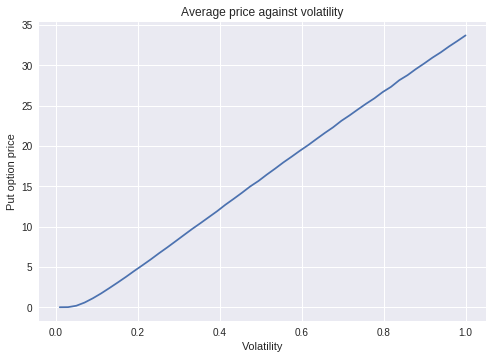

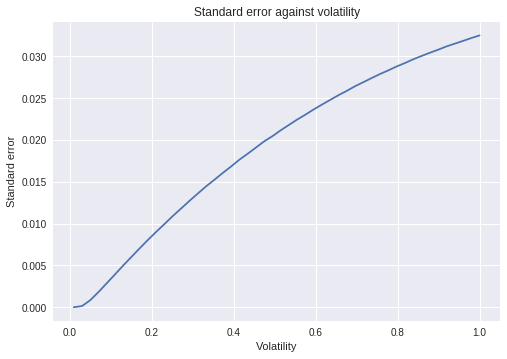

In [12]:
plt.figure()
plt.plot(volatilities, prices_vol)
plt.title('Average price against volatility')
plt.xlabel('Volatility')
plt.ylabel('Put option price')
plt.show()

plt.figure()
plt.plot(volatilities, std_errors_vol)
plt.title('Standard error against volatility')
plt.xlabel('Volatility')
plt.ylabel('Standard error')
plt.show()

## Part 2: Estimation of sensitivities in MC

#### Subsection 1

Calculate the δ by applying the following methods:

- Use different seeds for the bumped and unbumped estimate of the value;
    T Z (2)
  
- Use the same seed for the bumped and unbumped estimate of the value;

Compare your results which the values obtained in Assignment I.

In [0]:
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
sim = 100000

sim_sizes = [10**i for i in [4, 5, 6, 7]]
epsilons = [0.01, 0.02, 0.5]

true_put_delta = -0.32626

In [14]:
seed_1 = 8500
seed_2 = 9000
    
print("DIFFERENT SEEDS (8500 and 9000)\n")
for e in epsilons:    
    for sim in sim_sizes:
        print('Epsilon: {}  - Paths: {}'.format(e, sim))
        price, _ = montecarlo_simulation_put(S, v, r, T, K, sim, seed_1)
        price_e, _ = montecarlo_simulation_put(S + e, v, r, T, K, sim, seed_2)
        delta = (price_e - price) / e
        error = (delta / true_put_delta - 1) * 100
        print('Delta estimate: %.4f' % delta, end='   ')
        print('Relative error: %.4f%%' % error)
        print('%.2f\%% (%.3f)' % (error, delta))
    print('')

DIFFERENT SEEDS (8500 and 9000)

Epsilon: 0.01  - Paths: 10000
Delta estimate: -0.3363   Relative error: 3.0821%
3.08\% (-0.336)
Epsilon: 0.01  - Paths: 100000
Delta estimate: 3.7295   Relative error: -1243.1055%
-1243.11\% (3.729)
Epsilon: 0.01  - Paths: 1000000
Delta estimate: -0.0258   Relative error: -92.1007%
-92.10\% (-0.026)
Epsilon: 0.01  - Paths: 10000000
Delta estimate: -0.2446   Relative error: -25.0360%
-25.04\% (-0.245)

Epsilon: 0.02  - Paths: 10000
Delta estimate: -0.3331   Relative error: 2.1072%
2.11\% (-0.333)
Epsilon: 0.02  - Paths: 100000
Delta estimate: 1.7018   Relative error: -621.6052%
-621.61\% (1.702)
Epsilon: 0.02  - Paths: 1000000
Delta estimate: -0.1757   Relative error: -46.1553%
-46.16\% (-0.176)
Epsilon: 0.02  - Paths: 10000000
Delta estimate: -0.2853   Relative error: -12.5693%
-12.57\% (-0.285)

Epsilon: 0.5  - Paths: 10000
Delta estimate: -0.3261   Relative error: -0.0433%
-0.04\% (-0.326)
Epsilon: 0.5  - Paths: 100000
Delta estimate: -0.2407   Relati

In [15]:
seed = 8700

print("SAME SEED (8700)\n")
for e in epsilons:
    for sim in sim_sizes:
        print('Epsilon: {}  - Paths: {}'.format(e, sim))
        price, _ = montecarlo_simulation_put(S, v, r, T, K, sim, seed)
        price_e, _ = montecarlo_simulation_put(S + e, v, r, T, K, sim, seed)
        delta = (price_e - price) / e
        error = (delta / true_put_delta - 1) * 100
        print('Delta estimate: %.4f' % delta, end='   ')
        print('Relative error: %.4f%%' % error)
        print('%.3f\%% (%.4f)' % (error, delta))
    print('')

SAME SEED (8700)

Epsilon: 0.01  - Paths: 10000
Delta estimate: -0.3167   Relative error: -2.9199%
-2.920\% (-0.3167)
Epsilon: 0.01  - Paths: 100000
Delta estimate: -0.3247   Relative error: -0.4657%
-0.466\% (-0.3247)
Epsilon: 0.01  - Paths: 1000000
Delta estimate: -0.3262   Relative error: -0.0091%
-0.009\% (-0.3262)
Epsilon: 0.01  - Paths: 10000000
Delta estimate: -0.3262   Relative error: -0.0150%
-0.015\% (-0.3262)

Epsilon: 0.02  - Paths: 10000
Delta estimate: -0.3166   Relative error: -2.9511%
-2.951\% (-0.3166)
Epsilon: 0.02  - Paths: 100000
Delta estimate: -0.3246   Relative error: -0.4959%
-0.496\% (-0.3246)
Epsilon: 0.02  - Paths: 1000000
Delta estimate: -0.3261   Relative error: -0.0357%
-0.036\% (-0.3261)
Epsilon: 0.02  - Paths: 10000000
Delta estimate: -0.3261   Relative error: -0.0422%
-0.042\% (-0.3261)

Epsilon: 0.5  - Paths: 10000
Delta estimate: -0.3119   Relative error: -4.4088%
-4.409\% (-0.3119)
Epsilon: 0.5  - Paths: 100000
Delta estimate: -0.3201   Relative erro

#### Subsection 2

Consider a digital option which pays 1 euro if the stock price at expiry is higher than the strike and otherwise nothing. Calculate the hedge parameter δ using the method used in 1. Explain your results and use the sophisticated methods discussed in the lectures to improve your results.


In [0]:
def montecarlo_simulation_binary(S, v, r, T, K, sim, seed=None):
    """
    Run Monte Carlo simulation to estimate call option prices for digital options.
    
    S: price at time t
    v: volatility
    r: risk-free-rate
    T: annualised expiry time (in years)
    K: strike price
    sim: amount of simulations per estimated option price
    seed: default = None
    """
    if seed is not None:
        np.random.seed(seed)
        
    # Compute stock prices at time T using geometric Brownian motion
    prices = S * np.exp((r - 0.5 * v**2) * T + v * np.sqrt(T) * np.random.normal(size=sim))
    
    # Determine payoffs
    payoffs = prices - K
    payoffs[payoffs < 0] = 0
    payoffs[payoffs > 0] = 1
    
    # Compute MC estimate and standard error
    price = math.exp(-r * T) * payoffs.mean()
    std_error = payoffs.std() / math.sqrt(sim)
    
    return price, std_error

In [0]:
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
sim = 100000

sim_sizes = [10**i for i in [4, 5, 6, 7]]
epsilons = [0.01, 0.02, 0.5]

true_binary_delta = 0.01821

In [18]:
seed = 52

print("SAME SEED (52)\n")
for e in epsilons:
    for sim in sim_sizes:
        print('Epsilon: {}  - Paths: {}'.format(e, sim))
        price, _ = montecarlo_simulation_binary(S, v, r, T, K, sim, seed)
        price_e, _ = montecarlo_simulation_binary(S + e, v, r, T, K, sim, seed)
        delta = (price_e - price) / e
        error = (delta / true_binary_delta - 1) * 100
        print('Delta estimate: %.4f' % delta, end='   ')
        print('Relative error: %.4f%%' % error)
        print('%.3f\%% (%.4f)' % (error, delta))
    print('')

SAME SEED (52)

Epsilon: 0.01  - Paths: 10000
Delta estimate: 0.0188   Relative error: 3.4338%
3.434\% (0.0188)
Epsilon: 0.01  - Paths: 100000
Delta estimate: 0.0151   Relative error: -17.2530%
-17.253\% (0.0151)
Epsilon: 0.01  - Paths: 1000000
Delta estimate: 0.0179   Relative error: -1.7379%
-1.738\% (0.0179)
Epsilon: 0.01  - Paths: 10000000
Delta estimate: 0.0177   Relative error: -2.6688%
-2.669\% (0.0177)

Epsilon: 0.02  - Paths: 10000
Delta estimate: 0.0188   Relative error: 3.4338%
3.434\% (0.0188)
Epsilon: 0.02  - Paths: 100000
Delta estimate: 0.0146   Relative error: -19.8388%
-19.839\% (0.0146)
Epsilon: 0.02  - Paths: 1000000
Delta estimate: 0.0177   Relative error: -2.7723%
-2.772\% (0.0177)
Epsilon: 0.02  - Paths: 10000000
Delta estimate: 0.0178   Relative error: -2.2292%
-2.229\% (0.0178)

Epsilon: 0.5  - Paths: 10000
Delta estimate: 0.0183   Relative error: 0.3308%
0.331\% (0.0183)
Epsilon: 0.5  - Paths: 100000
Delta estimate: 0.0176   Relative error: -3.4963%
-3.496\% (0

In [0]:
def montecarlo_simulation_binary_likelihood(S, v, r, T, K, sim, seed=None):
    """
    Run Monte Carlo simulation to estimate delta value for digital option
    
    S: price at time t
    v: volatility
    r: risk-free-rate
    T: annualised expiry time (in years)
    K: strike price
    sim: amount of simulations per estimated option price
    seed: default = None
    """
    if seed is not None:
        np.random.seed(seed)
        
    # Compute stock prices at time T using geometric Brownian motion
    rnd = np.random.normal(size=sim)
    
    prices = S * np.exp((r - 0.5 * v**2) * T + v * np.sqrt(T) * rnd)
    
    # Determine payoffs
    payoffs = prices - K
    payoffs[payoffs < 0] = 0
    payoffs[payoffs > 0] = 1
    
    # Determine deltas
    deltas = math.exp(-r * T) * payoffs * rnd / (v * S * math.sqrt(T))
    
    # Average deltas
    delta = deltas.mean()
    
    return delta

In [21]:
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
true_binary_delta = 0.01821

sim_sizes = [10**i for i in [4, 5, 6, 7]]

for sim in sim_sizes:
    print('Paths: {}'.format(sim))
    delta = montecarlo_simulation_binary_likelihood(S, v, r, T, K, sim)
    error = (delta / true_binary_delta - 1) * 100
    print('Delta estimate: %.4f' % delta, end='   ')
    print('Relative error: %.4f%%' % error)
    print('%.3f\%% (%.4f)' % (error, delta))

Paths: 10000
Delta estimate: 0.0185   Relative error: 1.5109%
1.511\% (0.0185)
Paths: 100000
Delta estimate: 0.0181   Relative error: -0.6046%
-0.605\% (0.0181)
Paths: 1000000
Delta estimate: 0.0182   Relative error: -0.1589%
-0.159\% (0.0182)
Paths: 10000000
Delta estimate: 0.0182   Relative error: -0.1176%
-0.118\% (0.0182)


## Part 3: Variance reduction



In [0]:
def compute_asian_BS(S, v, r, T, K, N): 
    """
    Compute call option price for Asian option using Black-Scholes formula
    
    S: price at time t
    v: volatility
    r: risk-free-rate
    T: annualised expiry time (in years)
    K: strike price
    N: periods for stock price average
    """
    # Compute parameters of ln(geometric mean), normal distribution
    mean = math.log(S) + (r - v**2 / 2) * (N+1) / (2*N) * T
    var = v**2 * T * (N+1) * (2*N + 1) / (6 * N**2)
    stdev = math.sqrt(var)
    
    # Compute expectation of geometric mean (lognomral distribution)
    E_An = math.exp(mean + var / 2)
    
    # Apply BS formulas for d1, d2 and call price
    d1 = (math.log(E_An / K) + var / 2) / stdev
    d2 = (math.log(E_An / K) - var / 2) / stdev
    
    return math.exp(-r*T) * (E_An * norm.cdf(d1) - K * norm.cdf(d2))

In [0]:
def montecarlo_simulation_asian_geometric(S, v, r, T, K, N, sim, seed=None):
    """
    Run Monte Carlo simulation to estimate call option prices for Asian options
    -> based on geometric average of N stock prices between [0, T]
    
    S: price at time t
    v: volatility
    r: risk-free-rate
    T: annualised expiry time (in years)
    K: strike price
    N: periods for stock price average
    sim: amount of simulations per estimated option price
    seed: default = None
    """
    if seed is not None:
        np.random.seed(seed)
    
    dt = T / N
    
    prices = np.zeros(shape=(sim, N+1))
    prices[:, 0] = S
    
    for i in range(1, N+1):
        eps = np.random.normal(size=(sim))
        prices[:, i] = prices[:, i-1] * np.exp((r - 0.5 * v**2) * dt + v * np.sqrt(dt) * eps)

    prices = prices[:, 1:]
    
    payoffs = gmean(prices, axis=1) - K
    payoffs[payoffs < 0] = 0
    
    price = math.exp(-r * T) * payoffs.mean()
    std_error = np.std(payoffs) / math.sqrt(sim)
    
    return price, std_error

In [24]:
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
N = 1
sim = 1000000

price, std_error = montecarlo_simulation_asian_geometric(S, v, r, T, K, N, sim)
print('Simulated price: %.4f.   Std error: %.4f' % (price, std_error))
print("Analytic value: %.4f\n\n" % compute_asian_BS(S, v, r, T, K, N))

Simulated price: 11.5507.   Std error: 0.0163
Analytic value: 11.5443




In [25]:
print('Price experiments')

N_experiments = [1, 2, 10, 50, 100, 200, 300, 365]
for N in N_experiments:
    print('Periods for averaging: ', N, '\n')

    price, std_error = montecarlo_simulation_asian_geometric(S, v, r, T, K, N, sim)
    price_bs = compute_asian_BS(S, v, r, T, K, N)
    print('Simulated price: %.4f.   Std error: %.4f' % (price, std_error))
    print("95%% CI: [%.4f, %.4f]" %(price - 1.96 * std_error, price + 1.96 * std_error))
    print("Analytic value: %.4f" % price_bs)
    print("%.4f & %.4f & [%.4f, %.4f] & %.4f \\\\ \n\n" % (price, std_error,
                                                    price - 1.96 * std_error,
                                                    price + 1.96 * std_error,
                                                    price_bs))

Price experiments
Periods for averaging:  1 

Simulated price: 11.5333.   Std error: 0.0162
95% CI: [11.5015, 11.5651]
Analytic value: 11.5443
11.5333 & 0.0162 & [11.5015, 11.5651] & 11.5443 \\ 


Periods for averaging:  2 

Simulated price: 8.8866.   Std error: 0.0123
95% CI: [8.8625, 8.9107]
Analytic value: 8.8781
8.8866 & 0.0123 & [8.8625, 8.9107] & 8.8781 \\ 


Periods for averaging:  10 

Simulated price: 6.8274.   Std error: 0.0093
95% CI: [6.8092, 6.8457]
Analytic value: 6.8358
6.8274 & 0.0093 & [6.8092, 6.8457] & 6.8358 \\ 


Periods for averaging:  50 

Simulated price: 6.4474.   Std error: 0.0088
95% CI: [6.4303, 6.4646]
Analytic value: 6.4351
6.4474 & 0.0088 & [6.4303, 6.4646] & 6.4351 \\ 


Periods for averaging:  100 

Simulated price: 6.3938.   Std error: 0.0087
95% CI: [6.3768, 6.4109]
Analytic value: 6.3851
6.3938 & 0.0087 & [6.3768, 6.4109] & 6.3851 \\ 


Periods for averaging:  200 

Simulated price: 6.3617.   Std error: 0.0086
95% CI: [6.3448, 6.3786]
Analytic value:

#### Delta hedge parameter for Asian option

In [0]:
def compute_asian_delta_bs(S, v, r, T, K, N):
    """
    Compute value of delta hedging parameter for Asian option using Black-Scholes formula
    
    S: price at time t
    v: volatility
    r: risk-free-rate
    T: annualised expiry time (in years)
    K: strike price
    N: periods for stock price average
    """
    # Parameters of ln(geometric mean), normal distribution
    mean = math.log(S) + (r - v**2 / 2) * (N+1) / (2*N) * T
    var = v**2 * T * (N+1) * (2*N + 1) / (6 * N**2)
    stdev = math.sqrt(var)
    
    # Get d1 and d2
    d1 = (math.log(math.exp(mean + var / 2) / K) + var / 2) / stdev
    d2 = (math.log(math.exp(mean + var / 2) / K) - var / 2) / stdev
    
    # Apply formula
    first_term = math.exp(r*T*(1-N)/(2*N) + v**2*T*(1-N**2)/(12*N**2))
    delta = first_term * norm.cdf(d1)
    delta += first_term / (v/N*math.sqrt((N+1)*(2*N+1)*T/6)) * norm.pdf(d1)
    delta -= K * math.exp(-r*T) * norm.pdf(d2) / (S*v/N*math.sqrt((N+1)*(2*N+1)*T/6))
    
    return delta

In [0]:
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
sim = 1000000
e = 0.01

In [28]:
print('Delta experiments')

N_experiments = [1, 50, 100, 200, 365]
for N in N_experiments:
    print('Periods for averaging: ', N, '\n')
    
    price, _ = montecarlo_simulation_asian_geometric(S, v, r, T, K, N, sim, 22)
    price_e, _ = montecarlo_simulation_asian_geometric(S + e, v, r, T, K, N, sim, 22)
    delta = (price_e - price) / e
    
    delta_bs = compute_asian_delta_bs(S, v, r, T, K, N)
    
    error = (delta / delta_bs - 1) * 100
    print("Bump-and-revalue: %.4f" % delta)
    print("Analytic value: %.4f" % delta_bs)
    print('Relative error: %.4f%%' % error)
    print("%.4f & %.4f & %.4f%% \\\\ \n\n" % (delta, delta_bs, error))

Delta experiments
Periods for averaging:  1 

Bump-and-revalue: 0.6747
Analytic value: 0.6737
Relative error: 0.1438%
0.6747 & 0.6737 & 0.1438% \\ 


Periods for averaging:  50 

Bump-and-revalue: 0.6258
Analytic value: 0.6261
Relative error: -0.0512%
0.6258 & 0.6261 & -0.0512% \\ 


Periods for averaging:  100 

Bump-and-revalue: 0.6257
Analytic value: 0.6257
Relative error: 0.0081%
0.6257 & 0.6257 & 0.0081% \\ 


Periods for averaging:  200 

Bump-and-revalue: 0.6255
Analytic value: 0.6255
Relative error: 0.0117%
0.6255 & 0.6255 & 0.0117% \\ 


Periods for averaging:  365 

Bump-and-revalue: 0.6249
Analytic value: 0.6254
Relative error: -0.0780%
0.6249 & 0.6254 & -0.0780% \\ 




#### Control Variate Technique

In [0]:
def control_variate_asian(S, v, r, T, K, N, sim, seed=None):
    """
    Run Control Variate technique to estimate call option prices for Asian options
    -> based on arithmetic average of N stock prices between [0, T]
    
    S: price at time t
    v: volatility
    r: risk-free-rate
    T: annualised expiry time (in years)
    K: strike price
    N: periods for stock price average
    sim: amount of simulations per estimated option price
    seed: default = None
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Generate prices 
    dt = T / N
    
    prices = np.zeros(shape=(sim, N+1))
    prices[:, 0] = S
    
    for i in range(1, N+1):
        eps = np.random.normal(size=(sim))
        prices[:, i] = prices[:, i-1] * np.exp((r - 0.5 * v**2) * dt + v * np.sqrt(dt) * eps)

    prices = prices[:, 1:]
    
    # Payoffs for geometric average
    geom_payoffs = gmean(prices, axis=1) - K
    geom_payoffs[geom_payoffs < 0] = 0
    
    # Payoffs for arithmetic average
    arith_payoffs = np.mean(prices, axis=1) - K
    arith_payoffs[arith_payoffs < 0] = 0
    
    # Analytic price for geometric option
    analytic_geometric = compute_asian_BS(S, v, r, T, K, N)
    
    # Control variate technique
    optim_beta = np.corrcoef(arith_payoffs, geom_payoffs)[1, 0] * arith_payoffs.std() / geom_payoffs.std()
    
    mc_geometric = math.exp(-r*T) * geom_payoffs.mean()
    mc_arithmetic = math.exp(-r*T) * arith_payoffs.mean()
    
    ctrl_var_arithmetic = mc_arithmetic - optim_beta * (mc_geometric - analytic_geometric)
    
    return ctrl_var_arithmetic, mc_arithmetic, analytic_geometric, mc_geometric

In [30]:
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
N = 10
sim = 10000

ctrl_var_a, mc_a, _, _ = control_variate_asian(S, v, r, T, K, N, sim)
print('Control variate estimate: ', ctrl_var_a)
print('MC estimate: ', mc_a)

Control variate estimate:  7.0684415998493915
MC estimate:  7.033951006312189


In [0]:
def run_simulation(S, v, r, T, K, N, paths, run_times) -> (np.array, np.array):
    variate_arith = []
    mc_arith = []

    for i in range(run_times):
        ctr_var_a, mc_a, _, _ = control_variate_asian(S, v, r, T, K, N, paths)
        variate_arith.append(ctr_var_a)
        mc_arith.append(mc_a)
        
    variate_arith = np.array(variate_arith)
    mc_arith = np.array(mc_arith)
    
    print('Run times: %i   Paths: %i' % (run_times, paths))
    print('Control variate mean: ', variate_arith.mean())
    print('Conrol variate std: ', variate_arith.std())
    print('MC mean: ', mc_arith.mean())
    print('MC std: ', mc_arith.std())
    print('%i & %i & %.4f & %.4f & %.4f & %.4f \\\\ \n' % (run_times, paths,
                                                           variate_arith.mean(), variate_arith.std(),
                                                           mc_arith.mean(), mc_arith.std()))
    
    return variate_arith, mc_arith

In [42]:
S = 100
v = 0.2
r = 0.06
T = 1
K = 99
N = 10
run_simulations = 20

generate_paths_list = np.arange(0, 100000+1, 5000)[1:]

ctrl_variate_means = []
ctr_variate_errs = []
mc_estimate_means = []
mc_estimate_errs = []

for no_paths in generate_paths_list:
    ctrl_variate_result, mc_estimate_result = run_simulation(S, v, r, T, K, N, no_paths, run_simulations)
    
    ctrl_variate_means.append(ctrl_variate_result.mean())
    ctr_variate_errs.append(ctrl_variate_result.std())
    mc_estimate_means.append(mc_estimate_result.mean())
    mc_estimate_errs.append(mc_estimate_result.std())


Run times: 20   Paths: 5000
Control variate mean:  7.068457888921323
Conrol variate std:  0.003803817570614737
MC mean:  7.060238949651873
MC std:  0.13331180173179977
20 & 5000 & 7.0685 & 0.0038 & 7.0602 & 0.1333 \\ 

Run times: 20   Paths: 10000
Control variate mean:  7.067146980805246
Conrol variate std:  0.0026355091881456157
MC mean:  7.111042140480423
MC std:  0.09445621421538664
20 & 10000 & 7.0671 & 0.0026 & 7.1110 & 0.0945 \\ 

Run times: 20   Paths: 15000
Control variate mean:  7.068102492803057
Conrol variate std:  0.002383244710038234
MC mean:  7.068842709804019
MC std:  0.064041427656751
20 & 15000 & 7.0681 & 0.0024 & 7.0688 & 0.0640 \\ 

Run times: 20   Paths: 20000
Control variate mean:  7.06807007289097
Conrol variate std:  0.001473247080994134
MC mean:  7.055911661987402
MC std:  0.04884540436954357
20 & 20000 & 7.0681 & 0.0015 & 7.0559 & 0.0488 \\ 

Run times: 20   Paths: 25000
Control variate mean:  7.0676559373539884
Conrol variate std:  0.0016547800747000099
MC mea

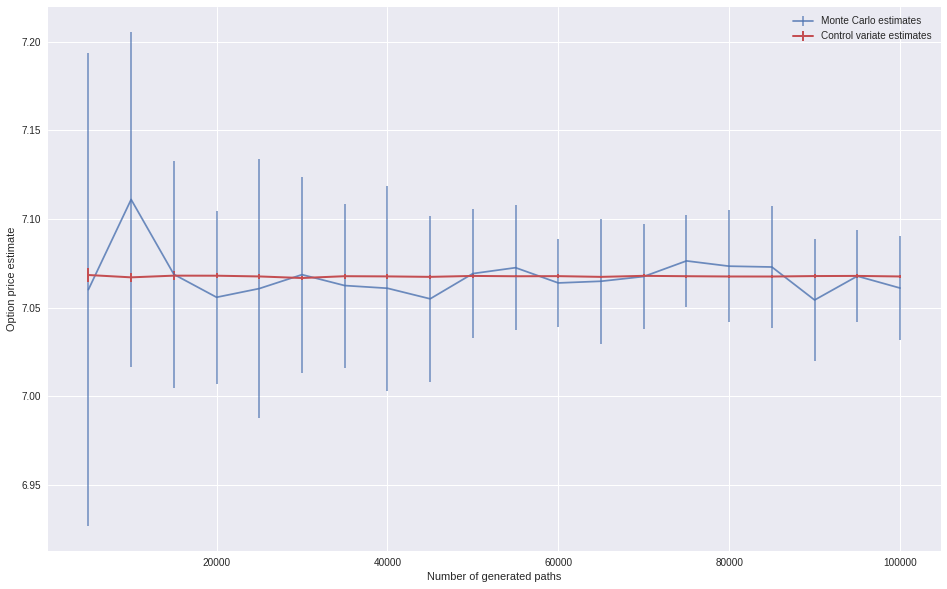

In [44]:
plt.figure(figsize=(16, 10))
plt.errorbar(generate_paths_list, mc_estimate_means, yerr=mc_estimate_errs,
             label='Monte Carlo estimates', elinewidth=1.5, capsize=7, alpha=0.8)
plt.errorbar(generate_paths_list, ctrl_variate_means, yerr=ctr_variate_errs,
             label='Control variate estimates', linewidth=2, elinewidth=2, capsize=7, color='r')
plt.legend()
plt.title('Control variate vs Monte Carlo')
plt.xlabel('Number of generated paths')
plt.ylabel('Option price estimate')
plt.show()